<a href="https://colab.research.google.com/github/jeochris/DL-Lecture-Study/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential,models
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# use following command to install cv2 package
# pip install opencv-python
import cv2

In [ ]:
train_path = './archive/alien_vs_predator_thumbnails/data/train'
val_path = './archive/alien_vs_predator_thumbnails/data/validation'

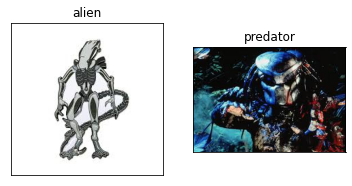

In [ ]:
alien_ex = train_path + '/alien/0.jpg'
predator_ex = train_path + '/predator/0.jpg'

plt.subplot(1, 2, 1)
plt.title('alien')
plt.imshow(plt.imread(alien_ex))
plt.xticks([]) , plt.yticks([])

plt.subplot(1, 2, 2)
plt.title('predator')
plt.imshow(plt.imread(predator_ex))
plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
width = 128
height = 128
trainGen = ImageDataGenerator(rescale=1/255.0, 
                              zoom_range=0.2, horizontal_flip=True)
valGen = ImageDataGenerator(rescale=1/255.0)

trainDatagen = trainGen.flow_from_directory(
    directory = train_path,
    target_size = (width,height),
    class_mode = 'binary',
    batch_size = 16)

Found 694 images belonging to 2 classes.


In [ ]:
valDatagen = valGen.flow_from_directory(
    directory = val_path,
    target_size = (width,height),
    class_mode = 'binary',
    batch_size = 16)

Found 200 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPool2D(4))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D(3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 2592)              0         
_________________________________________________________________
dense_82 (Dense)             (None, 128)               331904    
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)             

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(trainDatagen, batch_size=50, epochs=30, validation_data=valDatagen)

Epoch 1/30
44/44 [==============================] - 6s 147ms/step - loss: 0.6938 - accuracy: 0.5389 - val_loss: 0.6743 - val_accuracy: 0.6300
Epoch 2/30
44/44 [==============================] - 6s 141ms/step - loss: 0.6375 - accuracy: 0.6210 - val_loss: 0.7454 - val_accuracy: 0.5600
Epoch 3/30
44/44 [==============================] - 6s 134ms/step - loss: 0.5944 - accuracy: 0.6974 - val_loss: 0.5877 - val_accuracy: 0.6600
Epoch 4/30
44/44 [==============================] - 6s 142ms/step - loss: 0.5656 - accuracy: 0.7291 - val_loss: 0.6255 - val_accuracy: 0.6700
Epoch 5/30
44/44 [==============================] - 6s 135ms/step - loss: 0.5402 - accuracy: 0.7421 - val_loss: 0.5883 - val_accuracy: 0.6700
Epoch 6/30
44/44 [==============================] - 6s 141ms/step - loss: 0.4929 - accuracy: 0.7810 - val_loss: 0.5323 - val_accuracy: 0.7200
Epoch 7/30
44/44 [==============================] - 6s 137ms/step - loss: 0.5165 - accuracy: 0.7522 - val_loss: 0.5371 - val_accuracy: 0.7100
Epoch 

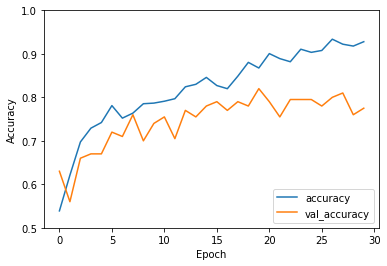

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')